In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from tabulate import tabulate


# rating_mapping = {"-":0,
#     "AAA": 1, "AA+": 2, "AA": 3, "AA-": 4,
#     "A+": 5, "A": 6, "A-": 7,
#     "BBB+": 8, "BBB": 9, "BBB-": 10,
#     "BB+": 11, "BB": 12, "BB-": 13,
#     "B+": 14, "B": 15, "B-": 16,
#     "CCC+": 17, "CCC": 18, "CCC-": 19,
#     "CC": 20, "C": 21, "D": 22
# }


In [2]:
data = pd.read_csv("new_regression_ready_clean.csv")
# data['S&P Rating'] = data['sp_rating'].map(rating_mapping)
data = data.replace({',': ''}, regex=True)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(0)  # Drops rows with NaN values; you can also use .fillna() if preferred


print(tabulate(data.head(5), headers='keys', tablefmt='psql'))


+----+----------+-------------+-----------------+---------------+-------------------+------------------+--------------------+--------------+--------------------+--------------------+---------------------+--------------------+-------------------+--------------------+--------------------+--------------+--------------+------------------+--------------+-----------------+-------------+---------------------+-----------------+----------------------+-----------------+----------------------+-------------------+------------------+---------------+----------------+----------------------+---------------------+---------------------------+--------------------+-------------------------------+---------------------+------------------+---------------------+---------------------+----------------+---------------------+---------------+----------------+----------------------+------------------+--------------------------+-----------------+-----------------------+-----------------------+-----------------------

In [3]:
# Separate features and target variable
X = data.iloc[:, 3:]  # all columns except the first one
y = data.iloc[:, 0]   # the first column

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize and train the logistic regression model
model = LogisticRegression()

param_grid = {
       'C': [0.001, 0.01, 0.1, 1, 10, 100],
       'penalty': ['l1', 'l2'],  # Note: 'l1' requires solver 'liblinear'
       'solver': ['liblinear', 'saga'],
       'max_iter': [300]   # You can also include other solvers like 'saga' if using 'l2'
   }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                              scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy: 0.604679802955665
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.53       742
           1       0.62      0.70      0.66       882

    accuracy                           0.60      1624
   macro avg       0.60      0.60      0.60      1624
weighted avg       0.60      0.60      0.60      1624



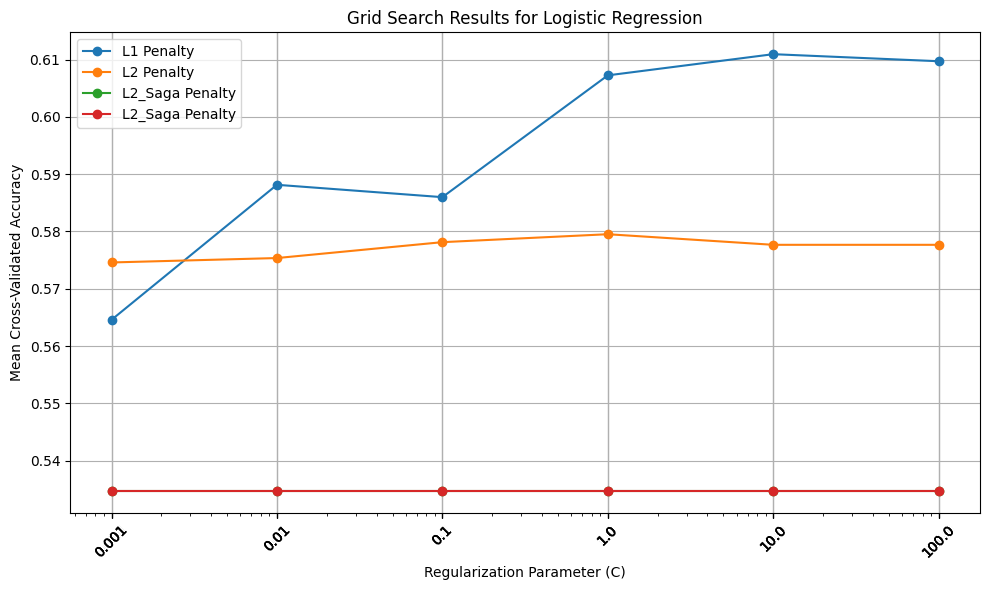

In [4]:
results = pd.DataFrame(grid_search.cv_results_)

# Filter results for plotting
results_l1 = results[(results['param_penalty'] == 'l1') & (results['param_solver'] == 'liblinear')]
results_l2 = results[(results['param_penalty'] == 'l2') & (results['param_solver'] == 'liblinear')]
results_l2_saga = results[(results['param_penalty'] == 'l2') & (results['param_solver'] == 'saga')]
results_l1_saga = results[(results['param_penalty'] == 'l1') & (results['param_solver'] == 'saga')]

# Plotting
plt.figure(figsize=(10, 6))

# Plot for 'l1' penalty
plt.plot(results_l1['param_C'], results_l1['mean_test_score'], marker='o', label='L1 Penalty', linestyle='-')

# Plot for 'l2' penalty
plt.plot(results_l2['param_C'], results_l2['mean_test_score'], marker='o', label='L2 Penalty', linestyle='-')
plt.plot(results_l2_saga['param_C'], results_l2_saga['mean_test_score'], marker='o', label='L2_Saga Penalty', linestyle='-')
plt.plot(results_l1_saga['param_C'], results_l1_saga['mean_test_score'], marker='o', label='L2_Saga Penalty', linestyle='-')

# Adding labels and title
plt.xscale('log')  # Log scale for better visibility
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Grid Search Results for Logistic Regression')
plt.xticks(ticks=results['param_C'], labels=results['param_C'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
print(results_l1)

Empty DataFrame
Columns: [mean_fit_time, std_fit_time, mean_score_time, std_score_time, param_C, param_max_iter, param_penalty, param_solver, params, split0_test_score, split1_test_score, split2_test_score, split3_test_score, split4_test_score, mean_test_score, std_test_score, rank_test_score]
Index: []


In [44]:
# for key, value in results.items():
#     print(f'key:{key}, value:{value}')

# for key, value in results.items():
#     print(f'key:{key}')

print()
print(tabulate(results[results['param_penalty'] == 'l2'],headers='keys', tablefmt='psql'))



+----+-----------------+----------------+-------------------+------------------+-----------+------------------+-----------------+----------------+-----------------------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|    |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time |   param_C |   param_max_iter | param_penalty   | param_solver   | params                                                                |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|----+-----------------+----------------+-------------------+------------------+-----------+------------------+-----------------+----------------+-----------------------------------------------------------------------+-----